# Прогноз изменения численности населения городов России

## Цель исследования
* Проанализировать изменение численности населения в различных городах.
* Оценить социально-экономическое влияние выявленных закономерностей.
* Сформулировать гипотезы по дальнейшей работе

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Для работы с данными используются средства библиотеки Pandas, для визуализации - средства библиотеки Matpointlib

In [2]:
df = pd.read_csv('forFBpost.csv', sep=';')

Производится имппорт и первичная оценка датасета

In [3]:
df.head()

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30250 entries, 0 to 30249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            30250 non-null  object 
 1   year             30250 non-null  int64  
 2   fact             3250 non-null   float64
 3   Модель           30250 non-null  float64
 4   Нижняя граница   30250 non-null  float64
 5   Верхняя граница  30250 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


Как видно из `info`, в столбце `fact` заполнено всего 10% значений. Необходимо проверить, не влияет ли это на полноту заполнения данных. Остальные колонки не имеют пропусков.

## Проверка данных
  
Для оценки того, достаточно ли данных в столбце `fact` необходимо:

1. Найти общее количество городов

In [5]:
len(df['Город'].unique())

248

2. Заполнить прокуски в столбце `fact` на `0`

In [6]:
df['fact'].fillna(0, inplace=True)

3. Отфильтровать ненулевые значения в столбце `fact`

In [7]:
fact = df[df['fact'] > 0]

4. Найти общее количество городов после применения фильтра

In [8]:
len(fact['Город'].unique())

248

Количество уникальных значений совпадает, значит данные о фактической численности есть для каждого города. Можно переходить к анализу

## Анализ изменения численности населения

В первую очередь рассмотрим наиболее крупные города.
Для этого отсортируем их по фактическому значению.

In [9]:
fact_pivot = fact.pivot_table(index='Город').sort_values(by='fact', ascending=False)

In [10]:
fact_pivot.head(10).style.format('{:.2f}')

,fact,year,Верхняя граница,Модель,Нижняя граница
Город,,,,,
Москва,12021537.15,2014.00,11991415.38,11950123.08,11909007.69
Уфа,1099513.54,2014.00,1096861.54,1094830.77,1092761.54
Краснодар,906706.00,2014.00,910153.85,894115.38,878369.23
Тольятти,714015.31,2014.00,717907.69,715307.69,712707.69
Ульяновск,640770.31,2014.00,641815.38,639776.92,637753.85
Ярославль,603338.69,2014.00,609938.46,603038.46,596200.00
Томск,576906.00,2014.00,583453.85,574538.46,565738.46
Оренбург,570691.62,2014.00,574000.00,569038.46,564123.08
Набережные Челны,522357.31,2014.00,522784.62,521061.54,519361.54


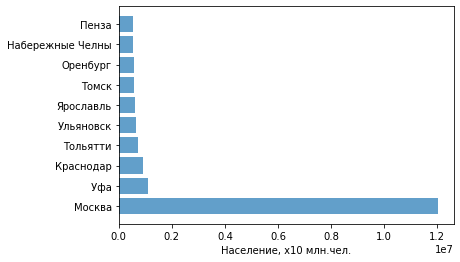

In [11]:
x=fact_pivot.head(10).index
y=fact_pivot['fact'].head(10)

plt.xlabel('Население, х10 млн.чел.')

plt.barh(x, y, alpha=0.7)
plt.show()

Видно, что население Москвы на порядок больше, чем в других городах, поэтому рассмотрим наиболее крупные города без учета Москвы.

In [12]:
fact_pivot = fact_pivot[fact_pivot.index != 'Москва']

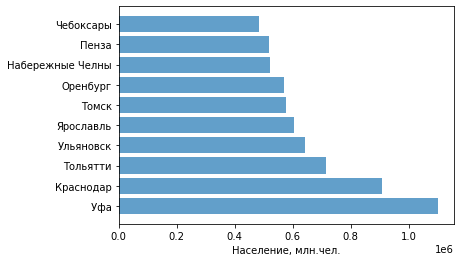

In [13]:
x=fact_pivot.head(10).index
y=fact_pivot['fact'].head(10)

plt.xlabel('Население, млн.чел.')

plt.barh(x, y, alpha=0.7)
plt.show()

Далее оценим прогноз изменения численности населения для Москвы

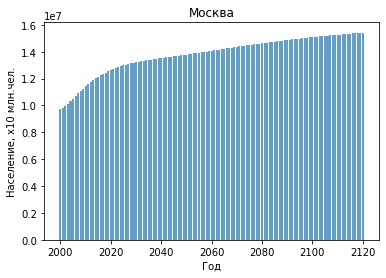

In [14]:
x=df[df['Город']=='Москва']['year']
y=df[df['Город']=='Москва']['Модель']

plt.xlabel('Год')
plt.ylabel('Население, х10 млн.чел.')
plt.title('Москва')

plt.bar(x, y, alpha=0.7)
plt.show()

Также стоит оценить разброс прогнозируемых значений, для этого строится график для значений столбцов `Нижняя граница` и `Верхняя граница`

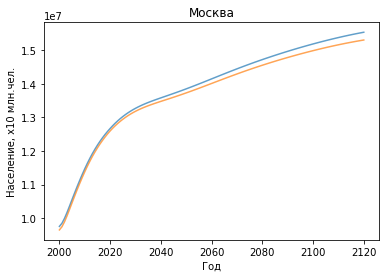

In [17]:
x=df[df['Город']=='Москва']['year']

ymin=df[df['Город']=='Москва']['Нижняя граница']
ymax=df[df['Город']=='Москва']['Верхняя граница']


plt.xlabel('Год')
plt.ylabel('Население, х10 млн.чел.')
plt.title('Москва')

plt.plot(x, ymax, alpha=0.7)
plt.plot(x, ymin, alpha=0.7)

plt.show()

Как видно из графика, после стремительного роста между 2000 и 2020м годами прогнозируется замедление скорости роста населения.  
Тем не менее, наблюдается уверенный восходящий тренд, что может говорить об экономической стабильности и перспективах развития региона.  
Разброс прогнозируемых данных при этом незначительный.

Следующим шагом является анализ прогнозируемой численности населения в других крупных городах.

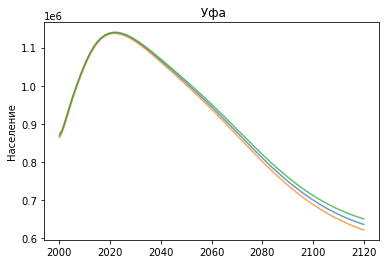

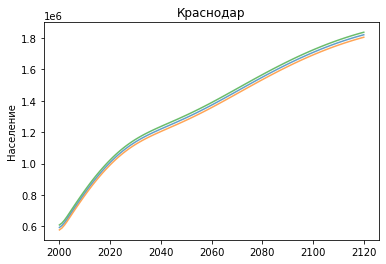

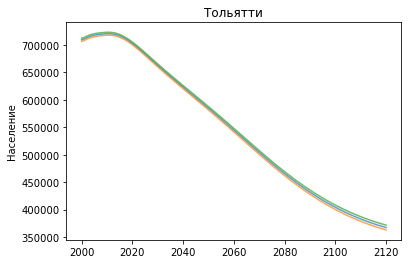

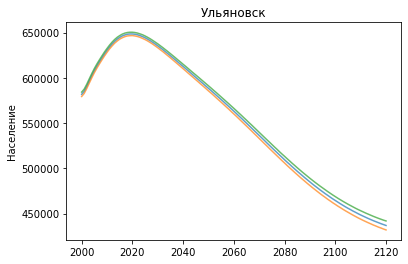

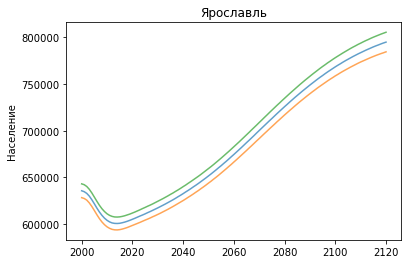

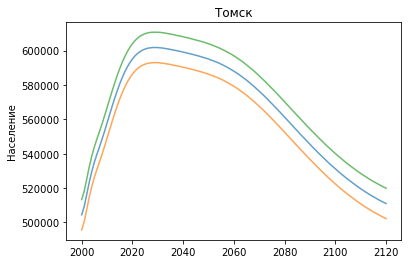

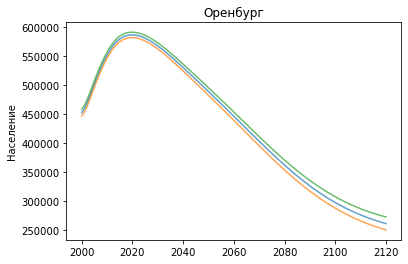

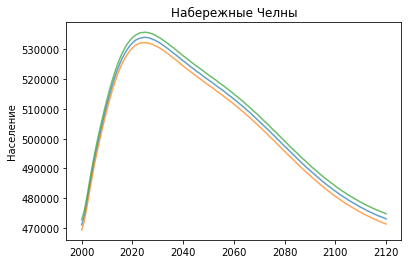

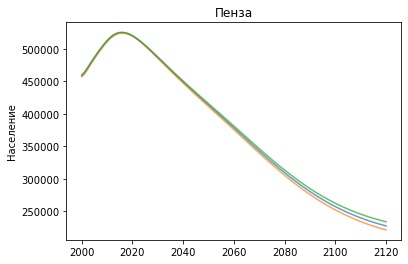

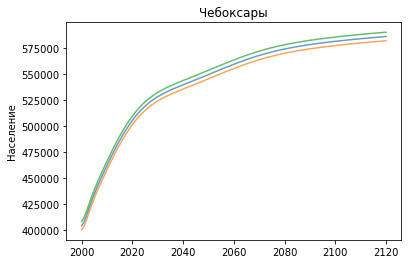

In [20]:
for city in fact_pivot.head(10).index:
    
    x=df[df['Город']==city]['year']
    y=df[df['Город']==city]['Модель']
    ymin=df[df['Город']==city]['Нижняя граница']
    ymax=df[df['Город']==city]['Верхняя граница']
    

    plt.plot(x, y, alpha=0.7)
    plt.plot(x, ymin, alpha=0.7)
    plt.plot(x, ymax, alpha=0.7)

    plt.ylabel('Год')
    plt.ylabel('Население')
    plt.title(city)  
    
    plt.show()

В других городах набюдаются разнонаправленные тенденции, которые можно разделить на различные категории:

1. Развивающиеся, например `Краснодар` и `Чебоксары` - прогнозируется дальнейший рост численности. К ним также можно отнести `Ярославль`, в котором, несмотря на уменьшение числа жителей прогнозируется развитие.
2. В стагнации - к данной категории можно отнести города, не демонстрирующие изменения численности населения более 10%. К примеру: `Томск`, `Набережные челны`.
3. На пороге кризиса - такие города, как `Уфа`, `Тольятти`, `Ульяновск`, `Оренбург`, `Пенза`. Для них наблюдается текущий рост населения, однако прогнозируется спад, для некоторых городов - довольно сильный, до 50%. 

Чтобы подробнее изучить экономическое влияние можно провести дополнительный анализ:

* Проанализировать перспективы развития других городов
* Объединить данные по регионам для оценки макроэкономической ситуации в каждом из регионов
* Объединить города в группы по количеству жителей на `Крупные`, `Средние` и `Маленькие` для оценки развития городов различных размеров
* Оценить наличие корреляции между фактическим изменением численности населения и прогнозируемым
